### A CLASSIFICATION PROBLEM

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [248]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# libraries to handle missing data
from sklearn.impute import SimpleImputer

# libraries to handle categorical data
from sklearn.preprocessing import OneHotEncoder

# libraries for pipelines and scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# libraries for model training
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# libraries for model evaluation
from sklearn.model_selection import cross_val_score


import os
from PIL import Image

In [187]:
df = pd.read_csv("/home/angie/Desktop/4th-Year-Project/titanic/data/train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [188]:
df.shape

(891, 12)

we have 12 features and 891 columns for the model training

In [189]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

All features except `Age`, `Cabin` and `Embarked` have no missing values

In [192]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


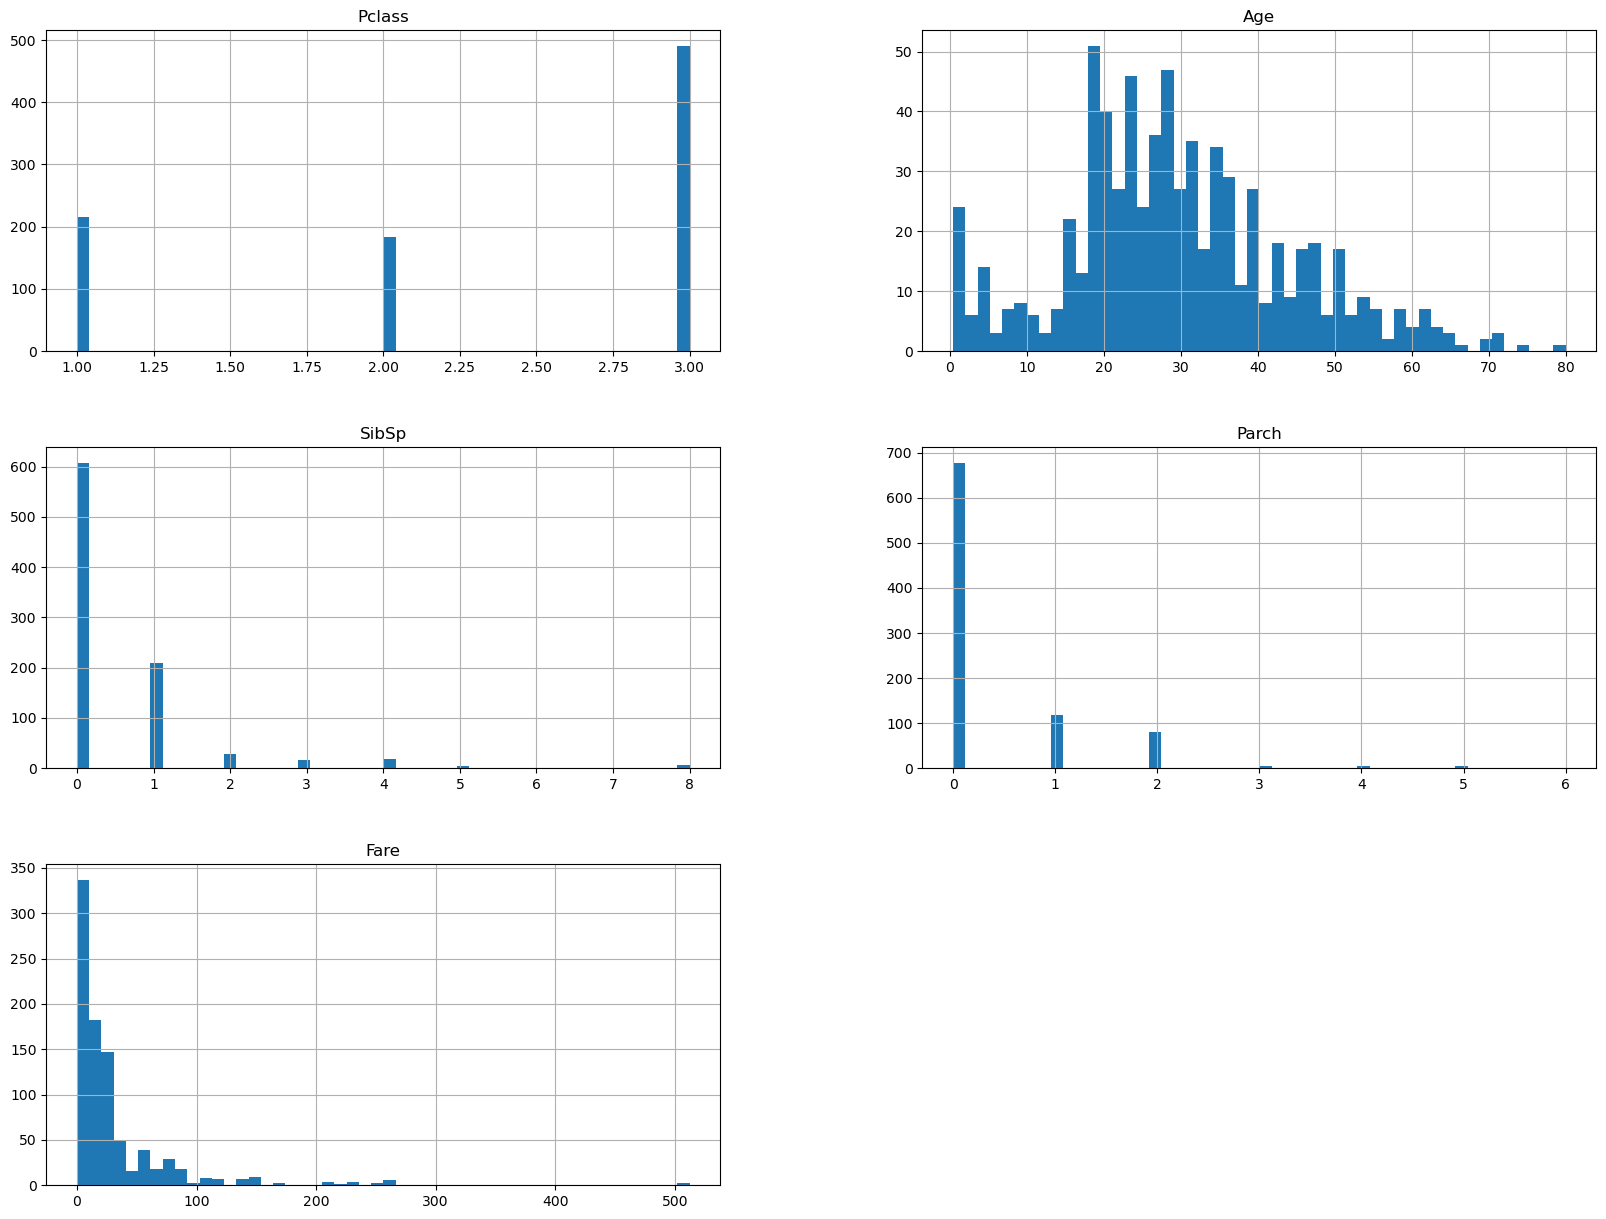

In [193]:
# a histogram to get an idea of the distribution of the numerical data
df_num = df.drop(['PassengerId', 'Survived'], axis=1)
df_num.hist(bins=50, figsize=(20,15))
plt.show()

In [194]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


the data distribution has a some outliers but has a heavier left tail

In [195]:
correlation_matrix = df.corr(method="pearson", min_periods=1, numeric_only=True)

correlation_matrix["Survived"].sort_values(ascending=True)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

For the Age attribute, it has 177 missing values, we can't just drop all the 177 rows we might end up losing important information. The best method will be replacing the missing values with the median age

In [196]:
df["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [197]:
# replace missing values in Age with median
df_imputer = df.drop(['Name', 'Sex','Ticket', 'Cabin', 'Embarked'], axis=1)

imputer = SimpleImputer(strategy='median')
imputer.fit(df_imputer)

SimpleImputer(strategy='median')

In [198]:
df_num_cols = imputer.transform(df_imputer)

In [199]:
df_num_cols = pd.DataFrame(df_num_cols, columns=df_imputer.columns)
df_num_cols.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

We have successfully replaced the missing values in the age column
We can work of the attributes with the `object` data type

In [200]:
df_obj = df.drop(['Age', 'PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], axis=1)
df_obj.isna().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [201]:
df_obj["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Since there are only 2 missing values for the `embarked` column, it can be replace by either the majority or the second majority class

In [202]:
# replace missing values in Embarked with the second most frequent class
df_obj["Embarked"].fillna('S', inplace=True)

/tmp/ipykernel_12923/1917646761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obj["Embarked"].fillna('S', inplace=True)


In [203]:
df_obj.isna().sum() 

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      0
dtype: int64

In [19]:
df_obj["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

`Cabin` has 687 missing values with 147 unique values, it does not seem possible to replace all of the missing value, it's better to drop the whole column

In [20]:
df_obj.drop(['Cabin'], axis=1, inplace=True)

In [21]:
df_obj.isna().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

We have successfully handled all the missing values in the dataset. Now we can move on to the next step which is to encode the categorical data.
1. We can first explore each column

In [22]:
df_obj.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [23]:
df_obj['Name'].value_counts(), df_obj['Ticket'].value_counts()

(Name
 Braund, Mr. Owen Harris                     1
 Boulos, Mr. Hanna                           1
 Frolicher-Stehli, Mr. Maxmillian            1
 Gilinski, Mr. Eliezer                       1
 Murdlin, Mr. Joseph                         1
                                            ..
 Kelly, Miss. Anna Katherine "Annie Kate"    1
 McCoy, Mr. Bernard                          1
 Johnson, Mr. William Cahoone Jr             1
 Keane, Miss. Nora A                         1
 Dooley, Mr. Patrick                         1
 Name: count, Length: 891, dtype: int64,
 Ticket
 347082      7
 CA. 2343    7
 1601        7
 3101295     6
 CA 2144     6
            ..
 9234        1
 19988       1
 2693        1
 PC 17612    1
 370376      1
 Name: count, Length: 681, dtype: int64)

the `Name` & `Ticket` columns has all unique instances, hence this column cannot be encoded because it will lead to `curse of dimensionality`
I'm gonna go with dropping the whole column and performing one-hot encoding on the rest of the categorical columns

In [24]:
# dropping the Name and Ticket columns
df_obj.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [63]:
# encoding the categorical data
encoder = OneHotEncoder()
df_obj_encoded = encoder.fit_transform(df_obj)

In [64]:
df_obj_encoded.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [205]:
df_num = df.drop(['Name', 'Sex','Ticket', 'Cabin', 'Embarked'], axis=1)
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [206]:
df_num.drop(['Survived'], axis=1)
titanic_labels = df_num['Survived'].copy()

In [226]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [227]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [234]:
# creating a pipeline to handle missing data and encode the categorical data
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

df_prepared = full_pipeline.fit_transform(df[num_attribs + cat_attribs])

In [235]:
df_prepared.shape

(891, 13)

In [236]:
# training and visualizing a decision tree
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(df_prepared, titanic_labels)

DecisionTreeClassifier(max_depth=4)

In [237]:
df.shape

(891, 12)

In [238]:
def image_path(fig_id):
    return os.path.join("images", fig_id)





export_graphviz(
    tree_clf,
    out_file=image_path("titanic_tree.dot"),
    feature_names=feature_names,
    class_names=['Died', 'Survived'],
    rounded=True,
    filled=True
)

ValueError: Length of feature_names, 1 does not match number of features, 13

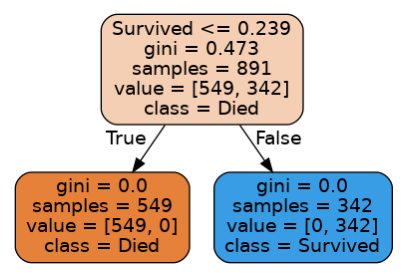

In [239]:
# Decision tree visualisation
img = Image.open("/home/angie/Desktop/4th-Year-Project/titanic/images/titanic_tree.png")
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()


In [240]:
df_test = pd.read_csv("/home/angie/Desktop/4th-Year-Project/titanic/data/test.csv")
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [241]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [242]:
df_num_test = df_test.drop(['Name', 'Sex','Ticket', 'Cabin', 'Embarked'], axis=1)
df_num_test.isna().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [243]:
df_obj_test = df_test.drop(['Age', 'PassengerId', 'Pclass', 'SibSp', 'Cabin','Parch','Fare', 'Name', 'Ticket'], axis=1)
df_obj_test.isna().sum() 

Sex         0
Embarked    0
dtype: int64

In [244]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [245]:
# transformation of the test data
num_attribs = ["PassengerId","Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

df_test_prepared = full_pipeline.fit_transform(df_test[num_attribs + cat_attribs])

In [246]:
df_test_prepared.shape

(418, 13)

In [247]:
y_pred = tree_clf.predict(df_test_prepared)

In [249]:
tree_scores = cross_val_score(tree_clf, df_prepared, titanic_labels, cv=10)
tree_scores.mean()

0.8014357053682897